In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
import scipy.constants as con
import scipy

In [21]:
B_0 = (10**9)/con.hbar
w = 18*(10**9)
T = ((2*np.pi)/w)
w1 = 10**9
im = 1j

In [22]:
#Defining H0
a = np.zeros((8,8))
a[0][0] = 21
a[1][1] = 3
a[2][2] = -9
a[3][3] = -15
a[4][4] = -15
a[5][5] = -9
a[6][6] = 3
a[7][7] = 21
H_0 = B_0*a*(con.hbar)**2

In [29]:
#Defining J+ and J-
b = np.zeros((8,8))
b[0][1] = np.sqrt(7)
b[1][2] = 2*np.sqrt(3)
b[2][3] = np.sqrt(15)
b[3][4] = 4
b[4][5] = np.sqrt(15)
b[5][6] = 2*np.sqrt(3)
b[6][7] = np.sqrt(7) 

Jp=b*con.hbar
Jm= np.transpose(Jp)

In [30]:
#Defining Idenity
I = np.zeros((8,8))
for i in range(len(I)):
    for j in range(len(I)):
        if(i==j):
            I[i][j] = 1

Question 5

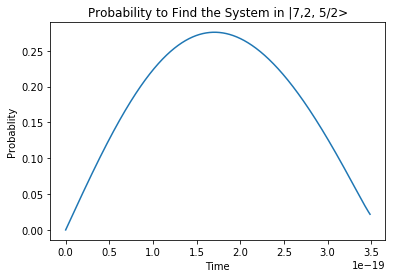

In [58]:
#finding state of |7/2|7/2> at time t
result = []
time = []
state = np.zeros(8)
state[0] = 1
N=1000
dt = T/N

for count in range(N):
    t = T*(count/N)
    H_1 = w1*np.e**(-1*im*dt*w)*Jp + w1*np.e**(im*dt*w)*Jm
    H=H_0+H_1
    u = I - ((im)/con.hbar)*(H)*(dt)
    time.append(t/(10**9))
    result.append(state)
    temp = np.matmul(u,state)
    norm=(np.linalg.norm(temp))
    temp = temp/norm
    state = temp
    
#finding probability of the state to be in |7/2|5/2>   
y = []
for i in range(len(result)):
    y.append(np.linalg.norm(result[i][1]))
    
    
plt.title("Probability to Find the System in |7,2, 5/2>")
plt.xlabel("Time")
plt.ylabel("Probablity")
plt.plot(time,y)
plt.show()

Question 7

In [43]:
#Defining Jz
Jz = np.zeros((8,8))
Jz[0][0] = 7/2
Jz[1][1] = 5/2
Jz[2][2] = 3/2
Jz[3][3] = 1/2
Jz[4][4] = -1/2
Jz[5][5] = -3/2
Jz[6][6] = -5/2
Jz[7][7] = -7/2
Jz=con.hbar*Jz

In [44]:
Heff=H_0+w1*(Jp+Jm)-w*(Jz)
print(Heff)

[[-4.42920156e-24  2.79013472e-25  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.79013472e-25 -4.42920156e-24  3.65314388e-25  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  3.65314388e-25 -3.79645848e-24  4.08433902e-25
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  4.08433902e-25 -2.53097232e-24
   4.21828720e-25  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  4.21828720e-25
  -6.32743080e-25  4.08433902e-25  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   4.08433902e-25  1.89822924e-24  3.65314388e-25  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  3.65314388e-25  5.06194464e-24  2.79013472e-25]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   

In [61]:
E_val, E_state = np.linalg.eig(Heff)
print("Eigenstates of Heff", E_state)

Eigenstates of Heff [[ 7.89739245e-01 -5.82454375e-01  1.92318198e-01  8.51454701e-03
  -1.96593988e-04 -2.75642089e-06  2.37268218e-08  1.13626169e-10]
 [ 4.36223205e-01  7.53543504e-01  4.88245940e-01  5.90774107e-02
  -2.69453314e-03 -6.27437934e-05  8.08952693e-07  5.41962637e-09]
 [-4.19141795e-01 -2.99726173e-01  7.99820913e-01  3.06565682e-01
  -2.80567401e-02 -1.08871805e-03  2.10470537e-05  1.97345753e-07]
 [ 1.01004422e-01  5.52394283e-02 -2.88656488e-01  9.25301033e-01
  -2.16820885e-01 -1.51867424e-02  4.56876080e-04  6.11959140e-06]
 [-1.17852129e-02 -5.63870142e-03  3.98135267e-02 -2.14177266e-01
  -9.62777741e-01 -1.59259560e-01  8.22685224e-03  1.65335264e-04]
 [ 7.81534546e-04  3.45032122e-04 -2.90177291e-03  2.00000986e-02
   1.58582291e-01 -9.80448200e-01  1.14669323e-01  3.84402186e-03]
 [-3.05972241e-05 -1.28011288e-05  1.20782262e-04 -9.67932856e-04
  -1.02376865e-02  1.14475719e-01  9.90667026e-01  7.32692966e-02]
 [ 6.50020609e-07  2.61689397e-07 -2.67900282e-06

Question 8

In [52]:
#Defining change of basis matrix
p=np.zeros((8,8))
for i in range(len(E_state)):
   p[i]=(E_state[i])

In [53]:
#Showing change of phi 
state = np.zeros(8)
state[0] = 1
phi=np.matmul(np.linalg.inv(p),state)
print(phi)

[ 7.89739245e-01 -5.82454375e-01  1.92318198e-01  8.51454701e-03
 -1.96593988e-04 -2.75642089e-06  2.37268218e-08  1.13626169e-10]


Question 9

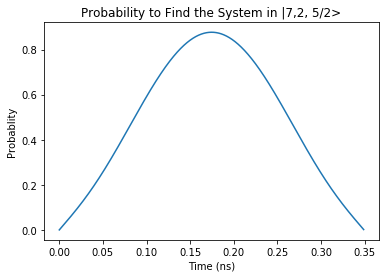

In [60]:
time=[]
y=[]
T = ((2*np.pi)/w)
for count in range(N):
    t = T*(count/N)
    time.append(t*(10**9))
    a=np.matmul(scipy.linalg.expm(-1*im*J*w*t/con.hbar),phi)
    a=np.matmul(p,a)
    b=np.linalg.norm(a[1])
    y.append(b)
plt.title("Probability to Find the System in |7,2, 5/2>")
plt.xlabel("Time (ns)")
plt.ylabel("Probablity")
plt.plot(time,y)
plt.show()